##  Segundo método

$$
y_{n+1} = y_n +hf +\frac{h^2}{2}\left(\frac{\partial f}{\partial x} + \frac{\partial f}{\partial y}f \right)
$$
donde $f$ y sus parciales son evaluadas en $f(x_n,y_n)$

In [1]:
from pylab import *
%matplotlib inline

In [18]:
def segundo_orden(ec_diff,p_ini,ec_jac,t_final,h=0.1):
    tiempo = arange(0,t_final+h,h)
    y = zeros(len(tiempo))
    y[0] = p_ini
    for i in range(len(tiempo)-1):
        y[i+1] = y[i]+h*ec_diff(y[i],tiempo[i])
        y[i+1] += 0.5*h*h*ec_jac(y[i],tiempo[i])[0]
        y[i+1] += 0.5*h*h*ec_jac(y[i],tiempo[i])[1]*ec_diff(y[i],tiempo[i])
    return tiempo,y

In [14]:
def euler1(ec_diff,p_ini,t_final,h=0.1):
    tiempo = arange(0,t_final+h,h)
    y = zeros(len(tiempo))
    y[0] = p_ini
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] +h*ec_diff(y[i],tiempo[i])
    return tiempo,y

In [4]:
def ec_diff(y,x):
    return x*sin(y)

def d_ec_diff(y,x):
    return sin(y),x*cos(y)

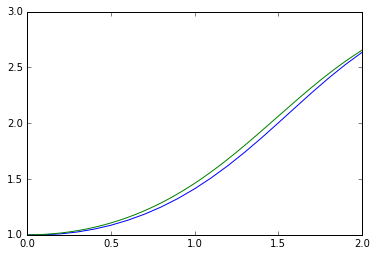

In [35]:
y_euler = euler1(ec_diff,1,2)
y_euler1 = euler1(ec_diff,1,2,0.01)
plot(y_euler[0],y_euler[1])
plot(y_euler1[0],y_euler1[1])
show()

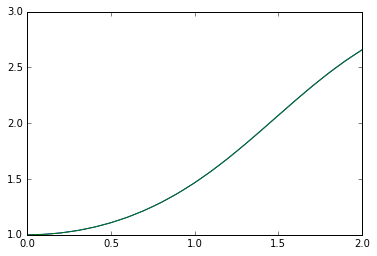

In [36]:
y_euler_mej = segundo_orden(ec_diff,1,d_ec_diff,2)
plot(y_euler_mej[0],y_euler_mej[1])
y_euler_mej1 = segundo_orden(ec_diff,1,d_ec_diff,2,0.01)
plot(y_euler_mej1[0],y_euler_mej1[1])
show()

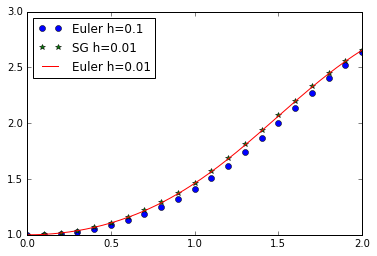

In [54]:
plot(y_euler[0],y_euler[1],"o",label ="Euler h=0.1")
plot(y_euler_mej[0],y_euler_mej[1],"*",label="SG h=0.01")
plot(y_euler1[0],y_euler1[1],label="Euler h=0.01")
legend(loc = 0)
show()